<a href="https://colab.research.google.com/github/Po743/229352-StatisticalLearning/blob/main/229351_LAB09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ปฏิบัติการครั้งที่ 7 กระบวนวิชา 229351 Statistical Learning for Data Science

คำชี้แจง

ให้เริ่มทำปฏิบัติการจาก colab notebook หรือไฟล์ *.ipynb ที่กำหนดให้ จากนั้นบันทึกไว้เป็นไฟล์ *.pdf แล้วส่งใน Assignments

ดาวน์โหลดข้อมูลรถยนต์ชนิดต่างใน link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/elecequip.csv

In [1]:
# uploading the csv file to colab

!wget -O elecequip.csv https://donlapark.pages.dev/229351/data/elecequip.csv

--2025-09-04 02:20:46--  https://donlapark.pages.dev/229351/data/elecequip.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.47.56, 172.66.44.200, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.47.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3844 (3.8K) [text/csv]
Saving to: ‘elecequip.csv’

elecequip.csv       100%[===================>]   3.75K  --.-KB/s    in 0s      

2025-09-04 02:20:46 (35.0 MB/s) - ‘elecequip.csv’ saved [3844/3844]



In [2]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('elecequip.csv', parse_dates=['time'],
                                        index_col='time',
                                        date_format='%Y-%m')

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


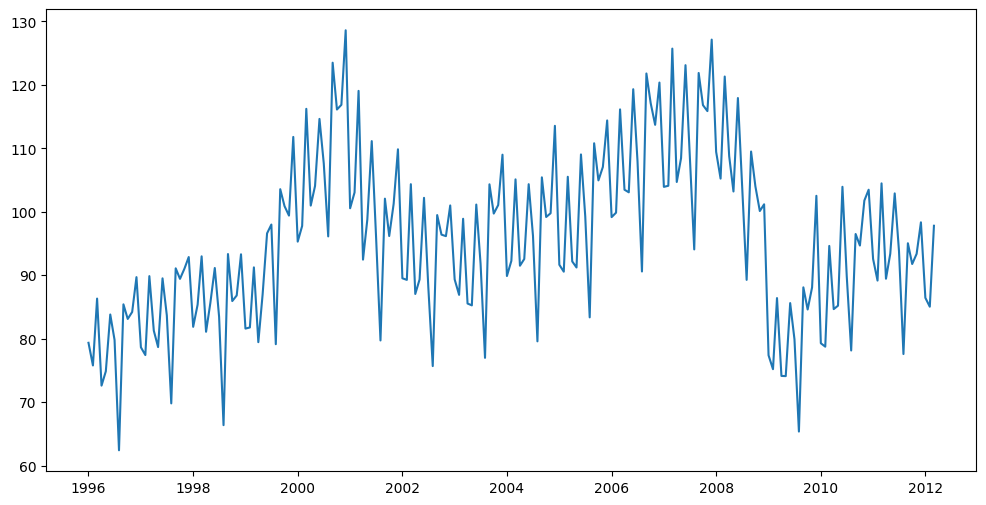

In [4]:
plt.figure(figsize=(12,6))
plt.plot(data["value"]);

In [5]:
# subsetting data at specified date

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.44


In [7]:
# Add or change values

data.loc['2012-01-01','value'] = 86.50

data

,Unnamed: 0,value
time,,
1996-01-01,1,79.35
1996-02-01,2,75.78
1996-03-01,3,86.32
1996-04-01,4,72.60
1996-05-01,5,74.86
...,...,...
2011-11-01,191,93.37
2011-12-01,192,98.34
2012-01-01,193,86.50


# Moving average

In [17]:
data['MA'] = data['value'].rolling(window=5,center=True).mean()
# data['MA'] = data['value'].rolling(window=12,center=True).mean().rolling(window=2).mean().shift(-1)

data.head(12)

,Unnamed: 0,value,MA
time,,,
1996-01-01,1,79.35,NaN
1996-02-01,2,75.78,NaN
1996-03-01,3,86.32,77.782
1996-04-01,4,72.60,78.674
1996-05-01,5,74.86,79.478
1996-06-01,6,83.81,74.696
1996-07-01,7,79.80,77.258
1996-08-01,8,62.41,78.908
1996-09-01,9,85.41,78.988


In [11]:
data.tail()

,Unnamed: 0,value,MA
time,,,
2011-11-01,191,93.37,93.004
2011-12-01,192,98.34,91.004
2012-01-01,193,86.50,92.210
2012-02-01,194,85.04,NaN
2012-03-01,195,97.80,NaN


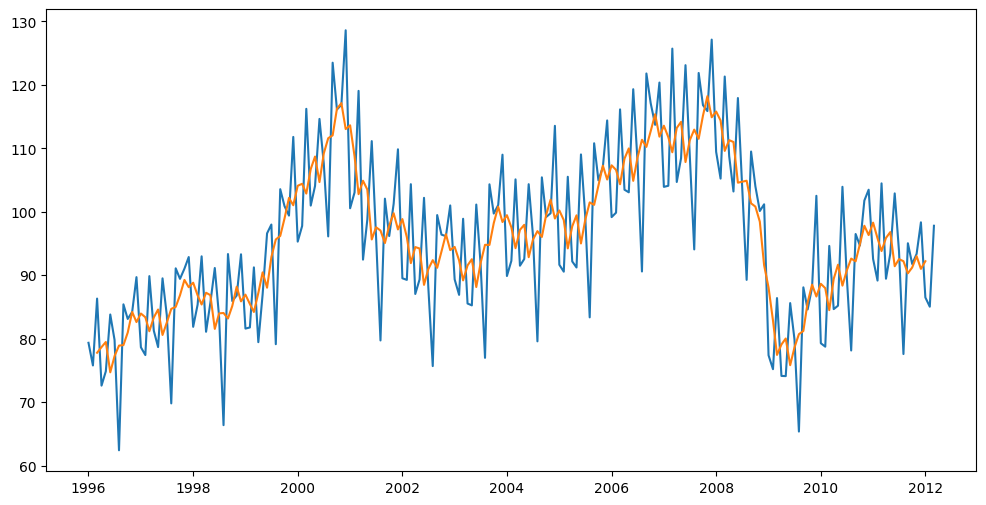

In [18]:
plt.figure(figsize=(12,6))
plt.plot(data['value'])
plt.plot(data['MA']);

# Classical decomposition

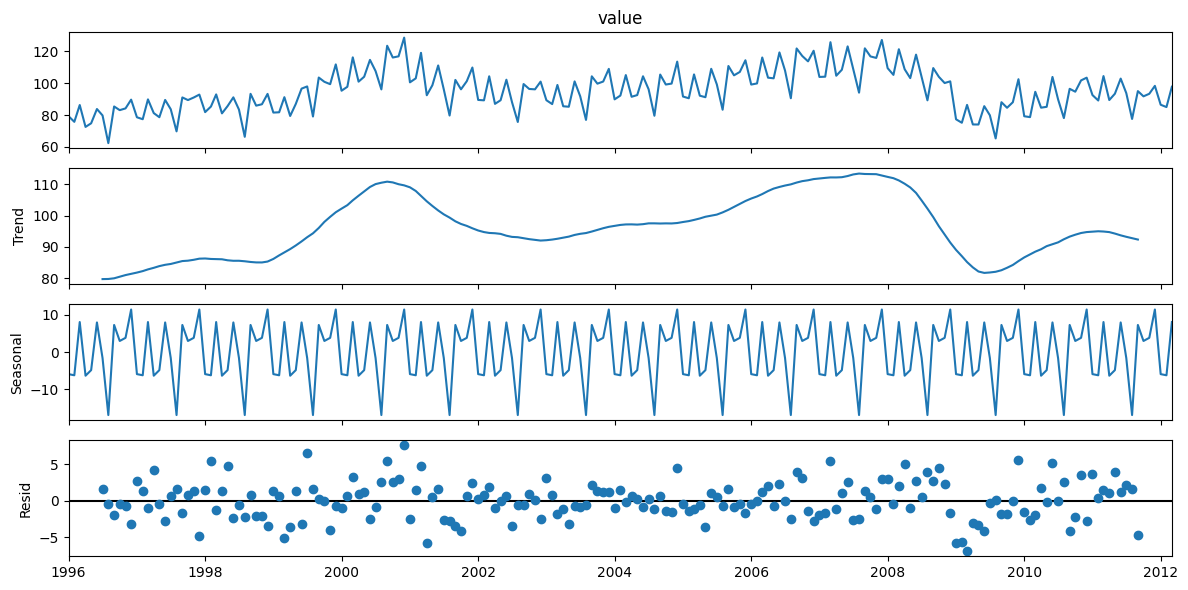

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
result_add = seasonal_decompose(data['value'], model='additive',period=12)

result_add.plot();

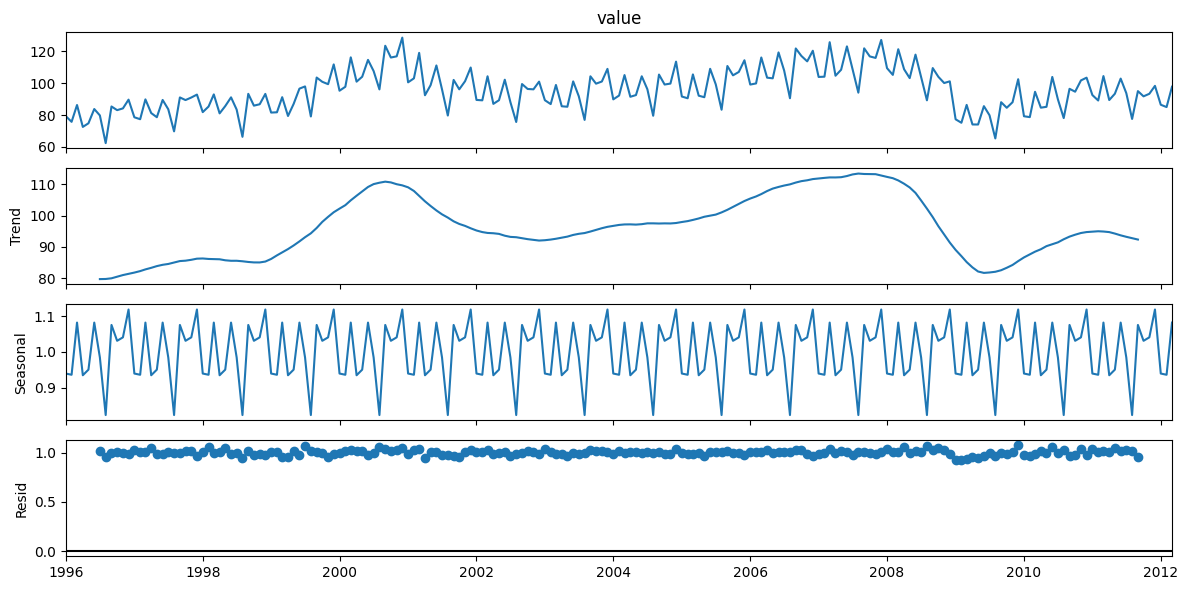

In [21]:
result_mul = seasonal_decompose(data['value'], model='multiplicative')

result_mul.plot();

### เรียกดูแต่ละส่วน

In [ ]:
print(result_add.trend)
print(result_add.seasonal)
print(result_add.resid)
print(result_add.observed)

### ปฏิบัติการครั้งที่ 7
1. สร้างโมเดลเพื่อการทำนายดังนี้
1.1 แบ่งข้อมูลออกเป็น 2 ส่วน
   - training set: วันที่ 1996-01-01 ถึง 2009-12-01
   - test set: วันที่ 2010-01-01 ถึง 2012-03-01  
1.2 แยกส่วนประกอบ $y_t=S_t+T_t+R_t$ บน training set
1.3 สร้าง time series ชุดใหม่ที่แสดงถึงทำนายค่าบน test set โดยนำค่า $T_t+R_t$ ของวันล่าสุดใน training set ที่มีค่า $T_t$ มาบวกกับแต่ละค่าใน $S_t$ จากวันที่ วันที่ 2010-01-01 ถึง 2012-03-01  
3. คำนวณ RMSE โดยใช้ฟังก์ชัน `rmse` ข้างล่าง
4. แสดงแผนภาพข้อมูล elecequip และค่าทำนายที่ได้

In [ ]:
Dota_train = data.loc['1996-01-01':'2009-12-01']
Dota_test = data.loc['2010-01-01':'2012-03-01']
# Dota_test

In [ ]:
Dota_train['MA'] = Dota_train['value'].rolling(window=5,center=True).mean()
print(Dota_train)
Dota_test['MA'] = Dota_test['value'].rolling(window=5,center=True).mean()
print(Dota_test)

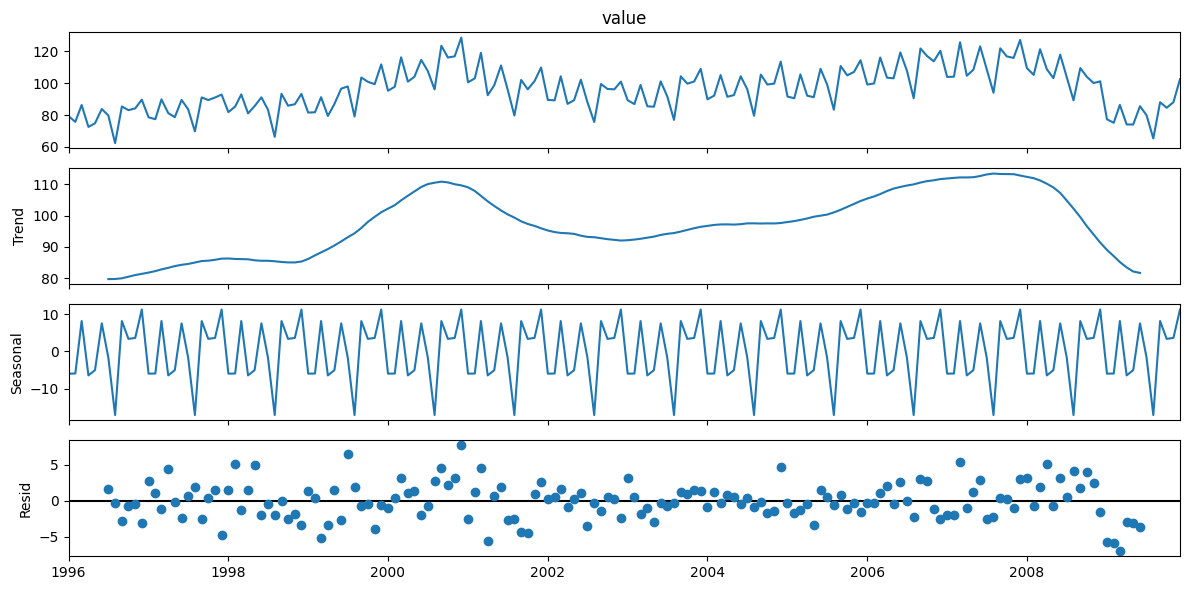

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rc("figure", figsize=(12,6))
Dota_train_2 = seasonal_decompose(Dota_train['value'], model='additive',period=12)

Dota_train_2.plot();

In [ ]:
print(Dota_train_2.trend)
# print(Dota_train_2.seasonal)
print(Dota_train_2.resid)
# print(Dota_train_2.observed)

In [94]:
lastTR = Dota_train_2.trend.dropna()[-1] + Dota_train_2.resid.dropna()[-1]

Dota_test_2 = seasonal_decompose(Dota_test['value'], model='additive',period=12)
# Dota_test_2 .plot()
val = Dota_test_2.seasonal + lastTR
val


/tmp/ipython-input-1534493926.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lastTR = Dota_train_2.trend.dropna()[-1] + Dota_train_2.resid.dropna()[-1]


,seasonal
time,
2010-01-01,75.017358
2010-02-01,71.468192
2010-03-01,86.872358
2010-04-01,72.024442
2010-05-01,76.445692
2010-06-01,86.509858
2010-07-01,76.783192
2010-08-01,62.541525
2010-09-01,80.254025


In [91]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

In [95]:
RMSE = rmse(Dota_test['value'],val)
print(RMSE)

14.397681178734551


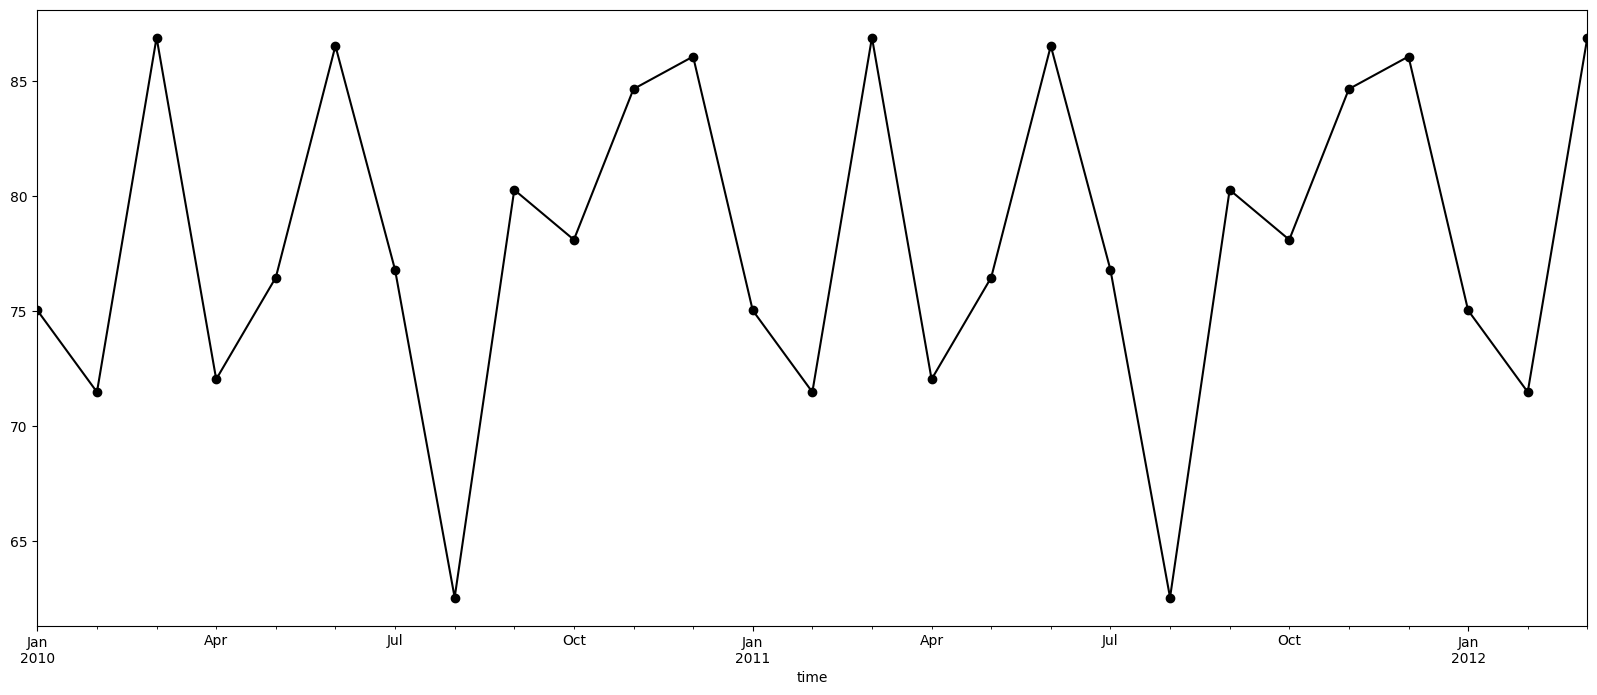

In [96]:
ax = val.plot(marker='o', color='black', figsize=(20,8))

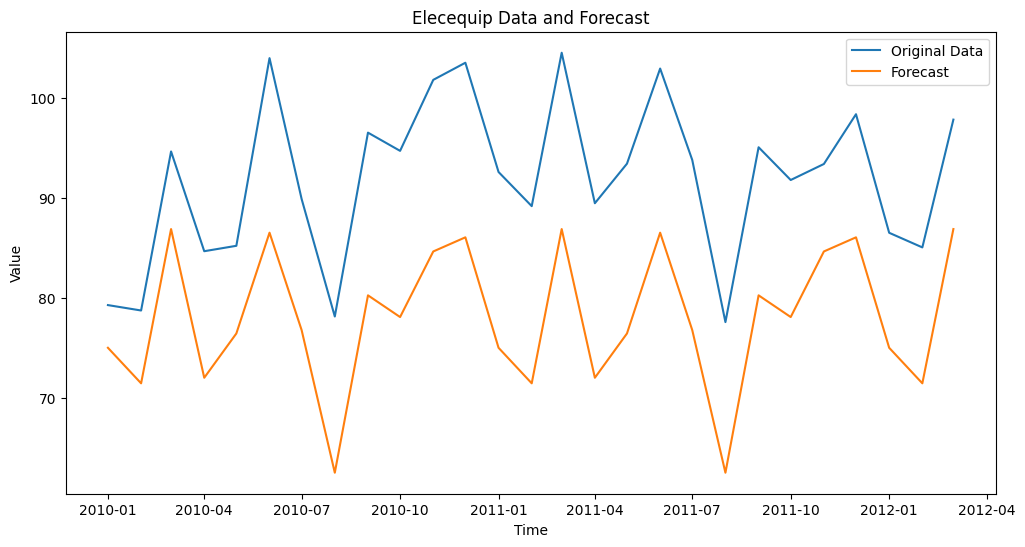

In [100]:
plt.figure(figsize=(12,6))
plt.plot(Dota_test['value'], label='Original Data')
plt.plot(val, label='Forecast')
plt.title('Elecequip Data and Forecast')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()